In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

sns.set() 

In [ ]:
!pip install scikit-learn --upgrade

## **0. Introduction**

**Autotrader-classification: Machine Learning on sales** is a classification project kernel which focuses on **Exploratory Data Analysis** and **Feature Engineering**.

**Autotrader-Dataset** is a great dataset to apply domain knowledge for feature engineering, so I made a research and learned a lot about the AutoTrader company. Although the American website (https://www.autotrader.com/) was unavailable at the time of trial i was able to access the UK website (https://www.autotrader.co.uk/) and discovered they deal in a variety of vehicles from new to old, and even exotic to regular, they are also into body types ranging between Cars, Luxury cars, Vans, Bikes, Motorhomes, Caravans and Trucks. 

With over 430k vehicles on the UK version I tried to find out some of those links between the columns and factors that had pricing of vehicles, also discovering that individuals are also allowed to post their listings on the platform. I believe there are other features still waiting to be discovered. 

This kernel has **3** main sections; **Exploratory Data Analysis**, **Feature Engineering** and **Model**, and it can achieve **78% (Macro Accuracy score) &83% (Micro Accuracy score)** .

### **1.0 Data Exploration and Preparation**


In [ ]:
drive.mount('/content/drive')
df = pd.read_csv ("/content/drive/MyDrive/7v0015-cw-classification-adverts (1).csv")

Mounted at /content/drive


In [ ]:
df.tail()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type,make_model,age,price_band
96264,202010295556637,28225.0,17,White,Mercedes-Benz,C Class,USED,2017.0,Saloon,False,Diesel,Mercedes-Benz - C Class,5,high
96265,202010305614799,122000.0,07,Silver,BMW,3 Series,USED,2007.0,Saloon,False,Petrol,BMW - 3 Series,15,low
96266,202010315639231,45000.0,15,Silver,Vauxhall,Corsa,USED,2015.0,Hatchback,False,Petrol,Vauxhall - Corsa,7,medium
96267,202010315647416,4075.0,69,Grey,Nissan,Juke,USED,2019.0,SUV,False,Petrol,Nissan - Juke,3,high
96268,202010315659271,52760.0,62,White,Nissan,Qashqai,USED,2012.0,SUV,False,Petrol,Nissan - Qashqai,10,medium


* Data set has **891** rows and test set has **418** rows
* One extra feature in training set is `price_band` feature, which is the target variable

In [ ]:
print('Number of Examples = {}'.format(df.shape[0]))
print('Dataset Shape = {}'.format(df.shape))
print(df.columns)

Number of Examples = 96269
Dataset Shape = (96269, 14)
Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'body_type', 'crossover_car_and_van',
       'fuel_type', 'make_model', 'age', 'price_band'],
      dtype='object')


### **2.0 Data Understanding and Exploration**

### **2.1 Understanding data columns**

* `public_reference` Unable to get actionable information on this variable
* `reg_code` Unable to get actionable information on this variable
* `mileage` Distance the vehicle has travelled throughout it's lifetime in miles (Lower is usually better)
* `standard_colour` Body paint color of vehicle at time of sale (5-total)
    - **Grey**
    - **Blue**
    - **Black**
    - **Silver**
    - **White**
* `standard_make` Manufacturer name of vehicle (11-total).

['MINI', 'Volkswagen', 'Mercedes-Benz', 'Vauxhall', 'Nissan',
       'Toyota', 'Audi', 'Renault', 'BMW', 'Fiat', 'Kia']
* `standard_model` Model name as stated by manufacturer for target vehicle (19-total).
['Hatch', 'Golf', 'C Class', 'Corsa', 'Qashqai', 'Yaris', 'Polo',
       'Astra', 'A1', 'E Class', 'Clio', 'A Class', '5 Series',
       '1 Series', '500', 'A3', 'Sportage', '3 Series', 'Juke']
* `vehicle_condition` Whether vehicle has had a prior owner or not, all vehicles in dataset are used.
    - **USED**
* `year_of_registration` Year of first registration of vehicle.
* `body_type` body shape of vehicle in question.
    - **Hatchback**
    - **Estate**
    - **Saloon**
    - **SUV**
    - **Coupe**
* `crossover_car_and_van` If car is a crossover or a van type vehicle:
    - **False**
* `fuel_type` (Fuel type) describes what type of fuel that propels the vehicle (**Fuel**, **Diesel**).
* `make_model` A combination of the make and model columns
* `age` An extrapolation from the registration date, (Current year - Reg year).
* `price_band` is the target variable we are trying to predict total of 4 bands (**high** or **medium** or **very** or **low**).

In [ ]:
df.describe(include=['O'])

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type,make_model,price_band
count,96257,96269,96269,96269,96269,96269,96269,96269,96269
unique,58,5,11,19,1,5,2,19,4
top,17,Black,BMW,Golf,USED,Hatchback,Petrol,Volkswagen - Golf,high
freq,10218,26479,16585,8975,96269,59227,54805,8975,41651


In [ ]:
df.standard_colour.unique()

array(['Grey', 'Blue', 'Black', 'Silver', 'White'], dtype=object)

In [ ]:
df.standard_make.unique()

array(['MINI', 'Volkswagen', 'Mercedes-Benz', 'Vauxhall', 'Nissan',
       'Toyota', 'Audi', 'Renault', 'BMW', 'Fiat', 'Kia'], dtype=object)

In [ ]:
df.standard_model.unique()

array(['Hatch', 'Golf', 'C Class', 'Corsa', 'Qashqai', 'Yaris', 'Polo',
       'Astra', 'A1', 'E Class', 'Clio', 'A Class', '5 Series',
       '1 Series', '500', 'A3', 'Sportage', '3 Series', 'Juke'],
      dtype=object)

In [ ]:
df.body_type.unique()

array(['Hatchback', 'Estate', 'Saloon', 'SUV', 'Coupe'], dtype=object)

In [ ]:
df.fuel_type.unique()

array(['Petrol', 'Diesel'], dtype=object)

In [ ]:
df.price_band.unique()

array(['high', 'medium', 'very high', 'low'], dtype=object)

### **2.1 Quantitative and qualitative data**

We shall proceed to look at statistics of both the `qualitative` and `numeric` values in order to further appreciate the data.

#### 2.1.1 Quantitative

- `Mileage` has a total of 96247 non null entries which is short of the grand total of the entire dataset indicating the prescence of missing values and carries metrics as follows:
  - `Average Mileage` = 42964.06
  - `Max Mileage`     = 999999
  - `S-Deviation`     = 34051.70

  <em>`Mileage has outliers which would have to be handled.`</em>
  
- `Year Of Reg.` has a total of 96269 non null entries, meaning no missing values and carries metrics as follows:
  - `Average Year` = 2015
  - `Max Year`     = 2020
  - `S-Deviation` = 3.7

- `Age` has a total of 96269 non null entries, meaning no missing values and carries metrics as follows:
  - `Average Age` = 6.9
  - `Max Age`     = 60.0
  - `S-Deviation` = 3.7

<em>`Year of registration and Age can be seen to have the same S-deviation signaling a possibility that the one is an extrapolation from the other.`</em>

#### 2.1.2 Qualitative

Firstly all qualitative columns except for `reg_code` have a total of 96269 each, meaning they are largely concise and with no missing data.

- `Standard Color` metrics as follows: 
  - `Most Occurent` = Black
  - `Percentage`    = 27.5%

- `Standard Make` metrics as follows:
  - `Most Occurent` = BMW
  - `Percentage`    = 17.2%

- `Standard Model` metrics as follows:
  - `Most Occurent` = Golf
  - `Percentage`    = 9.3%

- `Vehicle Condition` Contains only USED only

- `Body Type` metrics as follows:
  - `Most Occurent` = Hatchback
  - `Percentage`    = 61.5%

- `Fuel Type` metrics as follows:
  - `Most Occurent` = Petrol
  - `Percentage`    = 56.9%

- `Price Band` metrics as follows:
  - `Most Occurent` = High
  - `Percentage`    = 43.2%

In [ ]:
df.describe()

,public_reference,mileage,year_of_registration,age
count,9.626900e+04,96247.000000,96269.000000,96269.000000
mean,2.020082e+14,42964.067150,2015.096075,6.903925
std,1.194558e+10,34051.708175,3.766205,3.766205
min,2.014120e+14,0.000000,1962.000000,2.000000
25%,2.020091e+14,17000.000000,2013.000000,4.000000
50%,2.020100e+14,34352.000000,2016.000000,6.000000
75%,2.020102e+14,62000.000000,2018.000000,9.000000
max,2.020110e+14,999999.000000,2020.000000,60.000000


In [ ]:
print(df.info())
df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96269 entries, 0 to 96268
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       96269 non-null  int64  
 1   mileage                96247 non-null  float64
 2   reg_code               96257 non-null  object 
 3   standard_colour        96269 non-null  object 
 4   standard_make          96269 non-null  object 
 5   standard_model         96269 non-null  object 
 6   vehicle_condition      96269 non-null  object 
 7   year_of_registration   96269 non-null  float64
 8   body_type              96269 non-null  object 
 9   crossover_car_and_van  96269 non-null  bool   
 10  fuel_type              96269 non-null  object 
 11  make_model             96269 non-null  object 
 12  age                    96269 non-null  int64  
 13  price_band             96269 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(9)
memory usa

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type,make_model,age,price_band
27009,202009284304639,71000.0,16,Blue,BMW,1 Series,USED,2016.0,Hatchback,False,Diesel,BMW - 1 Series,6,medium
47428,202010024502830,9904.0,18,Black,Nissan,Qashqai,USED,2018.0,SUV,False,Petrol,Nissan - Qashqai,4,high
73618,202010064675736,20477.0,19,Silver,BMW,3 Series,USED,2019.0,Estate,False,Diesel,BMW - 3 Series,3,high


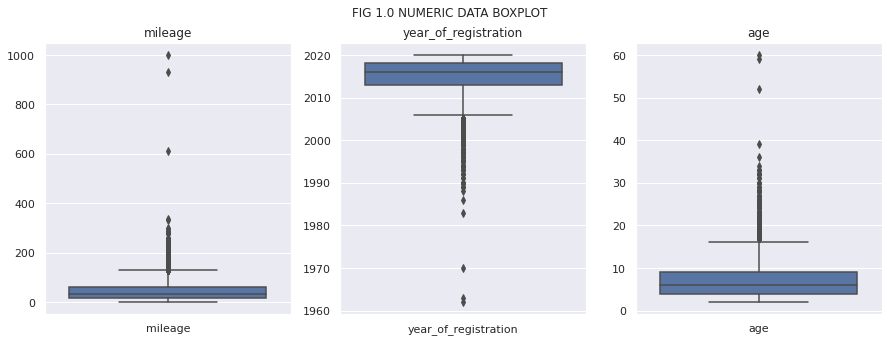

In [ ]:
# Further checks for outliers in numeric columns (BOX PLOT)

numeric_cols = ['mileage', 'year_of_registration', 'age']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for index, column in enumerate(numeric_cols):
  
  numeric_df = df[[column]]
  if column == "mileage":
    numeric_df[column] = numeric_df[column]/1000
  sns.boxplot(ax=axes[index], data=numeric_df)
  axes[index].set_title(column)
  fig.suptitle("FIG 1.0 NUMERIC DATA BOXPLOT")

### **3.0 Data Cleaning & Preparation**

### **3.1 Handle Missing Values**
As seen from below, some columns have missing values. `display_missing` function shows the count of missing values in every column in both training and test set.
* Training set have missing values in `reg_code ` and `mileage` columns

The count of missing values in `reg_code` and `mileage ` are smaller compared to total sample, roughly **0.02%** of the `mileage` and **0.013%** of the `reg_code` is missing. Missing values in `mileage` can be filled with descriptive statistical measures but that wouldn't work for `reg_code` following the fact that reg_code does not seem to have any statistical meaning to the rest of the data.

In [ ]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')

display_missing(df)

public_reference column missing values: 0
mileage column missing values: 22
reg_code column missing values: 12
standard_colour column missing values: 0
standard_make column missing values: 0
standard_model column missing values: 0
vehicle_condition column missing values: 0
year_of_registration column missing values: 0
body_type column missing values: 0
crossover_car_and_van column missing values: 0
fuel_type column missing values: 0
make_model column missing values: 0
age column missing values: 0
price_band column missing values: 0




#### **3.1.1 Mileage**
Missing values in `Mileage` can be filled in with mode of the data or most occuring but following the 0.013 percentage of missing values in this column it might just be better to drop the missing values and save what ever noise that this might cause. 

In [ ]:
clean_mileage_df = df[~df.mileage.isnull()]

In [ ]:
clean_mileage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96247 entries, 0 to 96268
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       96247 non-null  int64  
 1   mileage                96247 non-null  float64
 2   reg_code               96235 non-null  object 
 3   standard_colour        96247 non-null  object 
 4   standard_make          96247 non-null  object 
 5   standard_model         96247 non-null  object 
 6   vehicle_condition      96247 non-null  object 
 7   year_of_registration   96247 non-null  float64
 8   body_type              96247 non-null  object 
 9   crossover_car_and_van  96247 non-null  bool   
 10  fuel_type              96247 non-null  object 
 11  make_model             96247 non-null  object 
 12  age                    96247 non-null  int64  
 13  price_band             96247 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(9)
memory usa

#### **3.1.2 Drop Reg Code and Public Reference**
Missing values in `Reg Code` can also be filled in with mode of the data or most occuring but in this case the percentage of missing values is 0.02% which is negligible, also the column does not provide any useful correlation or meaning to the price and hence shall be dropped, and same applies to Public Reference.

In [ ]:
clean_df = clean_mileage_df.drop(["reg_code", "public_reference"], axis = 1)

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96247 entries, 0 to 96268
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mileage                96247 non-null  float64
 1   standard_colour        96247 non-null  object 
 2   standard_make          96247 non-null  object 
 3   standard_model         96247 non-null  object 
 4   vehicle_condition      96247 non-null  object 
 5   year_of_registration   96247 non-null  float64
 6   body_type              96247 non-null  object 
 7   crossover_car_and_van  96247 non-null  bool   
 8   fuel_type              96247 non-null  object 
 9   make_model             96247 non-null  object 
 10  age                    96247 non-null  int64  
 11  price_band             96247 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 8.9+ MB


### **3.2 Handle Outliers**
As seen from above plot `(FIG 1.0)`, all the numeric columns possess outliers which need to be handled.

We use the Inter-quartile range method to determine and cutoff outliers and hence reduce the presence of noise.

The values for `IQR` for each column is as listed below:
- IQR value for column `mileage` is: 45000.0
- IQR value for column `year_of_registration` is: 5.0
- IQR value for column `age` is: 5.0

After using this cut-off the end result is a new DataFrame with a shape of (92579, 12) meaning the outliers were about 4% of the total data.

` Once again the mileage outlier can be handled by adding in filling with the average dataset mileage but the drop is quite negligible, hence we shall avoid a fill in with the average.`

In [ ]:
# Removing the outliers (IQR Method)
# Function (removeOutliers) reference https://www.geeksforgeeks.org/how-to-use-pandas-filter-with-iqr/

def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
    return filtered_data

In [ ]:
outlier_free_mileage = removeOutliers(clean_df, "mileage")
outlier_free_age = removeOutliers(outlier_free_mileage, "age")
outlier_free_data = outlier_free_age

IQR value for column mileage is: 45000.0
IQR value for column age is: 5.0


In [ ]:
outlier_free_data.shape

(92579, 12)

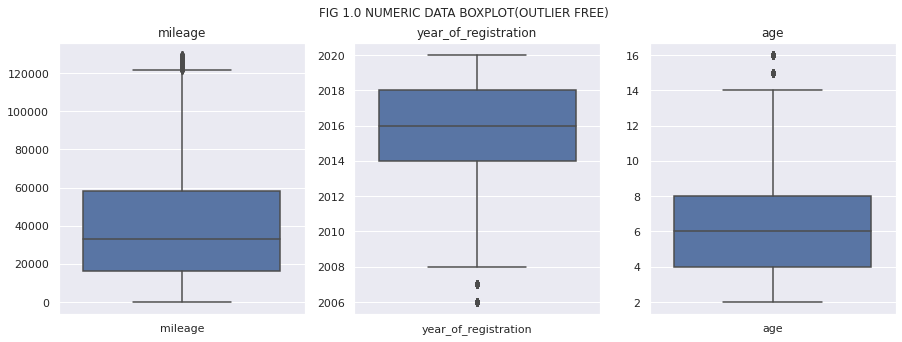

In [ ]:
# Further checks for outliers in numeric columns

numeric_cols = ['mileage', 'year_of_registration', 'age']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for index, column in enumerate(numeric_cols):
  
  numeric_df = outlier_free_data[[column]]
  sns.boxplot(ax=axes[index], data=numeric_df)
  axes[index].set_title(column)
  fig.suptitle("FIG 1.0 NUMERIC DATA BOXPLOT(OUTLIER FREE)")

### **3.3. Feature Engineering**

We will now encode the categorical features into indicators in order to make them useful for our model.

The categorical features `standard_colour, standard_make, standard_model, body_type, crossover_car_and_van, fuel_type, make_model` are converted to encoded features with `get_dummies`. While `mileage, year_of_registration, age` features are not converted because they are ordinal unlike the previous ones.

But `mileage` and `price_band` will be bined in order to have a cleaner set options for classification.

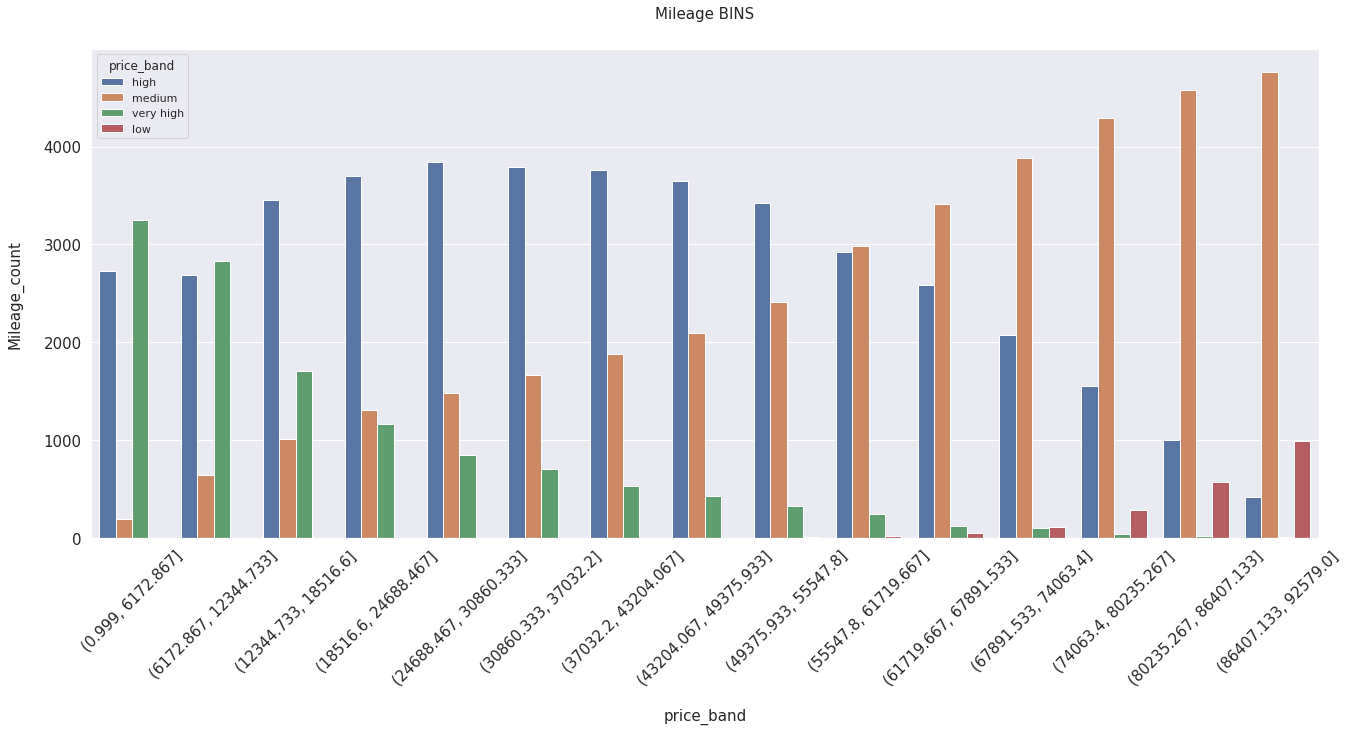

In [ ]:
outlier_free_data['cut_mileage'] = pd.qcut(outlier_free_data.mileage.rank(method='first'), 15)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='cut_mileage', hue='price_band', data=outlier_free_data)

plt.xlabel('price_band', size=15, labelpad=20)
plt.ylabel('Mileage_count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.title('Mileage BINS', size=15, y=1.05)
plt.xticks( rotation = 45)

plt.show()

In [ ]:
ix, bin = list(zip(*enumerate(sorted(outlier_free_data['cut_mileage'].unique()))))
classified_mileage_map = dict(zip(bin, ix))
outlier_free_data['mileage_class'] = outlier_free_data['cut_mileage'].map(classified_mileage_map)

In [ ]:
outlier_free_data.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type,make_model,age,price_band,cut_mileage,mileage_class
0,31534.0,Grey,MINI,Hatch,USED,2017.0,Hatchback,False,Petrol,MINI - Hatch,5,high,"(43204.067, 49375.933]",7
1,52023.0,Blue,Volkswagen,Golf,USED,2016.0,Estate,False,Diesel,Volkswagen - Golf,6,high,"(61719.667, 67891.533]",10
2,29500.0,Grey,Mercedes-Benz,C Class,USED,2012.0,Saloon,False,Petrol,Mercedes-Benz - C Class,10,medium,"(37032.2, 43204.067]",6
3,35300.0,Grey,Vauxhall,Corsa,USED,2018.0,Hatchback,False,Petrol,Vauxhall - Corsa,4,medium,"(43204.067, 49375.933]",7
4,47299.0,Black,Nissan,Qashqai,USED,2016.0,SUV,False,Diesel,Nissan - Qashqai,6,high,"(55547.8, 61719.667]",9


In [ ]:
valid_categorical_cols = outlier_free_data[['standard_colour', 'body_type','fuel_type','make_model']]
encoded_cols = pd.get_dummies(valid_categorical_cols)
encoded_cols.head()

,standard_colour_Black,standard_colour_Blue,standard_colour_Grey,standard_colour_Silver,standard_colour_White,body_type_Coupe,body_type_Estate,body_type_Hatchback,body_type_SUV,body_type_Saloon,fuel_type_Diesel,fuel_type_Petrol,make_model_Audi - A1,make_model_Audi - A3,make_model_BMW - 1 Series,make_model_BMW - 3 Series,make_model_BMW - 5 Series,make_model_Fiat - 500,make_model_Kia - Sportage,make_model_MINI - Hatch,make_model_Mercedes-Benz - A Class,make_model_Mercedes-Benz - C Class,make_model_Mercedes-Benz - E Class,make_model_Nissan - Juke,make_model_Nissan - Qashqai,make_model_Renault - Clio,make_model_Toyota - Yaris,make_model_Vauxhall - Astra,make_model_Vauxhall - Corsa,make_model_Volkswagen - Golf,make_model_Volkswagen - Polo
0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
complete_data = pd.concat([encoded_cols, outlier_free_data[['mileage_class', "age"]]], axis = 1)
complete_data

,standard_colour_Black,standard_colour_Blue,standard_colour_Grey,standard_colour_Silver,standard_colour_White,body_type_Coupe,body_type_Estate,body_type_Hatchback,body_type_SUV,body_type_Saloon,fuel_type_Diesel,fuel_type_Petrol,make_model_Audi - A1,make_model_Audi - A3,make_model_BMW - 1 Series,make_model_BMW - 3 Series,make_model_BMW - 5 Series,make_model_Fiat - 500,make_model_Kia - Sportage,make_model_MINI - Hatch,make_model_Mercedes-Benz - A Class,make_model_Mercedes-Benz - C Class,make_model_Mercedes-Benz - E Class,make_model_Nissan - Juke,make_model_Nissan - Qashqai,make_model_Renault - Clio,make_model_Toyota - Yaris,make_model_Vauxhall - Astra,make_model_Vauxhall - Corsa,make_model_Volkswagen - Golf,make_model_Volkswagen - Polo,mileage_class,age
0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7,5
1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,10,6
2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,10
3,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,4
4,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96264,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,5
96265,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,15
96266,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9,7
96267,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3


In [ ]:
classified_price_map = {'low': "0", 'medium': "1", 'high': "2", 'very high': "3"}
complete_data['price_band'] = outlier_free_data['price_band'].map(classified_price_map)

In [ ]:
complete_data.head()

,standard_colour_Black,standard_colour_Blue,standard_colour_Grey,standard_colour_Silver,standard_colour_White,body_type_Coupe,body_type_Estate,body_type_Hatchback,body_type_SUV,body_type_Saloon,fuel_type_Diesel,fuel_type_Petrol,make_model_Audi - A1,make_model_Audi - A3,make_model_BMW - 1 Series,make_model_BMW - 3 Series,make_model_BMW - 5 Series,make_model_Fiat - 500,make_model_Kia - Sportage,make_model_MINI - Hatch,make_model_Mercedes-Benz - A Class,make_model_Mercedes-Benz - C Class,make_model_Mercedes-Benz - E Class,make_model_Nissan - Juke,make_model_Nissan - Qashqai,make_model_Renault - Clio,make_model_Toyota - Yaris,make_model_Vauxhall - Astra,make_model_Vauxhall - Corsa,make_model_Volkswagen - Golf,make_model_Volkswagen - Polo,mileage_class,age,price_band
0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7,5,2
1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,10,6,2
2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,10,1
3,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,4,1
4,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,9,6,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(complete_data.drop(['price_band'], axis = 1), complete_data['price_band'], test_size=0.33, random_state=6)

## **4. Model**

### 4.1 Model selection and tuning

We can also try different machine learning models to improve performance. Each algorithm has different strengths and weaknesses, and so we need to select the algorithm that works best with our specific data. We will use the Scikit-learn library to compare the performance of the following algorithms:

* [KNearestNeighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) - KNearestNeighbors regression classifier
* [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) - Decision tree classifier.
* [SupporVectorClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) - Support Vector Classifier
* [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) - Logistic regression classifier.

#### 4.1.1 KNearest Neighbors

Testing our KNN model with varying values of (n) and weight types, we get the following macro-accuracy values:

- kNN (W=uniform, n=5)   ->	77.4%
- kNN (W=distance, n=5)  ->	78.1%	
- kNN (W=uniform, n=11)  ->	77.9%
- kNN (W=distance, n=11) ->	78.8%	

Best accuracy for knn on the training data is `kNN (W=distance, n=11)  ->	78.8%`

In [ ]:
# fit/evaluate: kNN 5 uniform
knnc_5u = KNeighborsClassifier(5, weights='uniform')
knnc_5u = Pipeline([('scaler', StandardScaler()), ('model', knnc_5u)])
knnc_5u.fit(X_train, y_train)
knnc_5u_acc_train = accuracy_score(y_train, knnc_5u.predict(X_train))
knnc_5u_bacc_train = balanced_accuracy_score(y_train, knnc_5u.predict(X_train))
knnc_5u_acc_test = accuracy_score(y_test, knnc_5u.predict(X_test))
knnc_5u_bacc_test = balanced_accuracy_score(y_test, knnc_5u.predict(X_test))

# # fit/evaluate: kNN 5 distance
knnc_5d = KNeighborsClassifier(5, weights='distance')
knnc_5d = Pipeline([('scaler', StandardScaler()), ('model', knnc_5d)])
knnc_5d.fit(X_train, y_train)
knnc_5d_acc_train = accuracy_score(y_train, knnc_5d.predict(X_train))
knnc_5d_bacc_train = balanced_accuracy_score(y_train, knnc_5d.predict(X_train))
knnc_5d_acc_test = accuracy_score(y_test, knnc_5d.predict(X_test))
knnc_5d_bacc_test = balanced_accuracy_score(y_test, knnc_5d.predict(X_test))

# # fit/evaluate: kNN 11 uniform
knnc_11u = KNeighborsClassifier(11, weights='uniform')
knnc_11u = Pipeline([('scaler', StandardScaler()), ('model', knnc_11u)])
knnc_11u.fit(X_train, y_train)
knnc_11u_acc_train = accuracy_score(y_train, knnc_11u.predict(X_train))
knnc_11u_bacc_train = balanced_accuracy_score(y_train, knnc_11u.predict(X_train))
knnc_11u_acc_test = accuracy_score(y_test, knnc_11u.predict(X_test))
knnc_11u_bacc_test = balanced_accuracy_score(y_test, knnc_11u.predict(X_test))

# # fit/evaluate: kNN 11 distance
knnc_11d = KNeighborsClassifier(11, weights='distance')
knnc_11d = Pipeline([('scaler', StandardScaler()), ('model', knnc_11d)])
knnc_11d.fit(X_train, y_train)
knnc_11d_acc_train = accuracy_score(y_train, knnc_11d.predict(X_train))
knnc_11d_bacc_train = balanced_accuracy_score(y_train, knnc_11d.predict(X_train))
knnc_11d_acc_test = accuracy_score(y_test, knnc_11d.predict(X_test))
knnc_11d_bacc_test = balanced_accuracy_score(y_test, knnc_11d.predict(X_test))

In [ ]:
knnc_scores_df = pd.DataFrame(
    dict(
        micro_acc_train=[knnc_5u_acc_train, knnc_5d_acc_train, knnc_11u_acc_train, knnc_11d_acc_train],
        macro_acc_train=[knnc_5u_bacc_train, knnc_5d_bacc_train, knnc_11u_bacc_train, knnc_11d_bacc_train],
        micro_acc_test=[knnc_5u_acc_test, knnc_5d_acc_test, knnc_11u_acc_test, knnc_11d_acc_test],
        macro_acc_test=[knnc_5u_bacc_test, knnc_5d_bacc_test, knnc_11u_bacc_test, knnc_11d_bacc_test]
    ), 
    index=['kNN_5_uniform', 'kNN_5_distance', 'kNN_11_uniform', 'kNN_11_distance'])

knnc_scores_df.sort_values(by="macro_acc_test", ascending=False)

,micro_acc_train,macro_acc_train,micro_acc_test,macro_acc_test
kNN_11_distance,0.901382,0.867221,0.851205,0.788986
kNN_5_distance,0.898367,0.863136,0.846917,0.781553
kNN_11_uniform,0.876118,0.806690,0.857587,0.779767
kNN_5_uniform,0.881939,0.825151,0.852939,0.774197


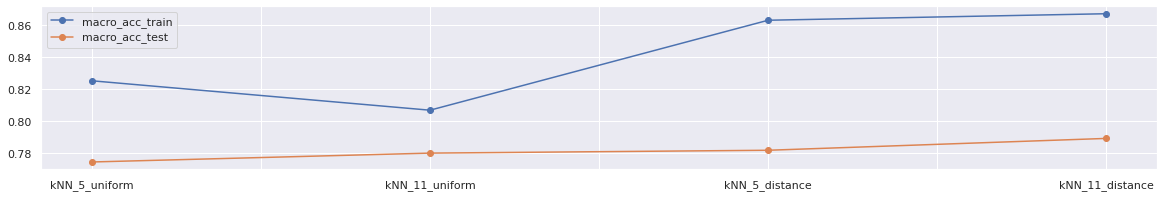

In [ ]:
knnc_scores_df[['macro_acc_train','macro_acc_test']].sort_values('macro_acc_test').plot(marker='o');

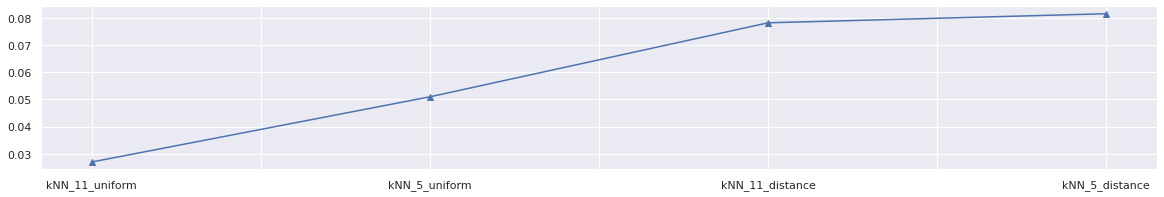

In [ ]:
(knnc_scores_df['macro_acc_train']-knnc_scores_df['macro_acc_test']).sort_values().plot(marker='^');

In [ ]:
cm = confusion_matrix(
    y_test, knnc_5d.predict(X_test), normalize='true'
)
# ConfusionMatrixDisplay(confusion_matrix=cm).plot();
# Best occurence of True-Positives seem to occur at labels 1 and 2 (Medium and High price bands) respectively. 

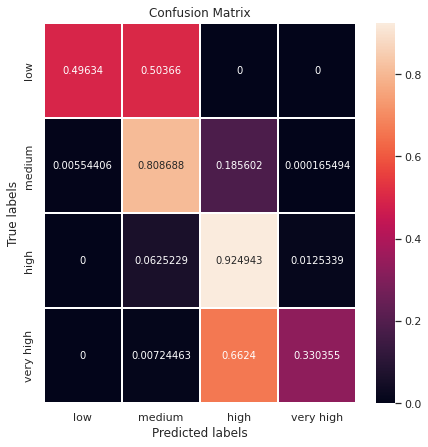

In [ ]:
ax= plt.subplot()
plt.rcParams["figure.figsize"] = (7,7)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, linewidths=1, linecolor='white');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(classified_price_map.keys()); 
ax.yaxis.set_ticklabels(classified_price_map.keys());

#### 4.1.2 Decision Tree Classifier

Testing our DTC model with varying values of (max_depth), we get the following macro-accuracy values:

- DTC (depth=7)   ->	64%  
- DTC (depth=5)   ->	56.5%
- DTC (depth=2)   ->	40.5%

Best accuracy for DTC on the training data is `DTC (depth=7)   ->	64%`

This is 18.8% worse than the KNN classifier

`It would be of note that the fact that Decision Tree gives priority to some unexpected features like make_model_vauxhaul_corsa and not to some more apparently related features like fuel_type and mileage_class might be the reason for its drop in accuracy.`

In [ ]:
# # # fit/evaluate: max_depth=2
dtc_md2 = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
dtc_md2_acc_train = accuracy_score(y_train, dtc_md2.predict(X_train))
dtc_md2_bacc_train = balanced_accuracy_score(y_train, dtc_md2.predict(X_train))
dtc_md2_acc_test = accuracy_score(y_test, dtc_md2.predict(X_test))
dtc_md2_bacc_test = balanced_accuracy_score(y_test, dtc_md2.predict(X_test))
dtc_md2_acc_train = accuracy_score(y_train, dtc_md2.predict(X_train))
dtc_md2_bacc_train = balanced_accuracy_score(y_train, dtc_md2.predict(X_train))
dtc_md2_acc_test = accuracy_score(y_test, dtc_md2.predict(X_test))
dtc_md2_bacc_test = balanced_accuracy_score(y_test, dtc_md2.predict(X_test))

# # # fit/evaluate: max_depth=5
dtc_md5 = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
dtc_md5_acc_train = accuracy_score(y_train, dtc_md5.predict(X_train))
dtc_md5_bacc_train = balanced_accuracy_score(y_train, dtc_md5.predict(X_train))
dtc_md5_acc_test = accuracy_score(y_test, dtc_md5.predict(X_test))
dtc_md5_bacc_test = balanced_accuracy_score(y_test, dtc_md5.predict(X_test))
dtc_md5_acc_train = accuracy_score(y_train, dtc_md5.predict(X_train))
dtc_md5_bacc_train = balanced_accuracy_score(y_train, dtc_md5.predict(X_train))
dtc_md5_acc_test = accuracy_score(y_test, dtc_md5.predict(X_test))
dtc_md5_bacc_test = balanced_accuracy_score(y_test, dtc_md5.predict(X_test))

# # # fit/evaluate: max_depth=7
dtc_md7 = DecisionTreeClassifier(max_depth=7).fit(X_train, y_train)
dtc_md7_acc_train = accuracy_score(y_train, dtc_md7.predict(X_train))
dtc_md7_bacc_train = balanced_accuracy_score(y_train, dtc_md7.predict(X_train))
dtc_md7_acc_test = accuracy_score(y_test, dtc_md7.predict(X_test))
dtc_md7_bacc_test = balanced_accuracy_score(y_test, dtc_md7.predict(X_test))
dtc_md7_acc_train = accuracy_score(y_train, dtc_md7.predict(X_train))
dtc_md7_bacc_train = balanced_accuracy_score(y_train, dtc_md7.predict(X_train))
dtc_md7_acc_test = accuracy_score(y_test, dtc_md7.predict(X_test))
dtc_md7_bacc_test = balanced_accuracy_score(y_test, dtc_md7.predict(X_test))

In [ ]:
dtc_scores_df = pd.DataFrame(
    dict(
        micro_acc_train=[dtc_md2_acc_train, dtc_md5_acc_train, dtc_md7_acc_train],
        macro_acc_train=[dtc_md2_bacc_train, dtc_md5_bacc_train, dtc_md7_bacc_train],
        micro_acc_test=[dtc_md2_acc_test, dtc_md5_acc_test, dtc_md7_acc_test],
        macro_acc_test=[dtc_md2_bacc_test, dtc_md5_bacc_test, dtc_md7_bacc_test]
    ), 
    index=['DecisionTree_MaxDepth_2', 'DecisionTree_MaxDepth_5', 'DecisionTree_MaxDepth_7']
)
dtc_scores_df.sort_values('macro_acc_test', ascending=False)

,micro_acc_train,macro_acc_train,micro_acc_test,macro_acc_test
DecisionTree_MaxDepth_7,0.792058,0.642166,0.788786,0.640082
DecisionTree_MaxDepth_5,0.765167,0.562687,0.762667,0.565520
DecisionTree_MaxDepth_2,0.687942,0.404103,0.687353,0.405706


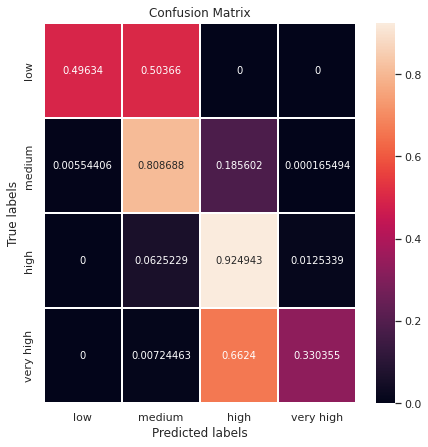

In [ ]:
cm = confusion_matrix(
    y_test, dtc_md7.predict(X_test), normalize='true'
)
# ConfusionMatrixDisplay(confusion_matrix=cm).plot();
ax= plt.subplot()
plt.rcParams["figure.figsize"] = (7,7)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, linewidths=1, linecolor='white');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(classified_price_map.keys()); 
ax.yaxis.set_ticklabels(classified_price_map.keys());

[]

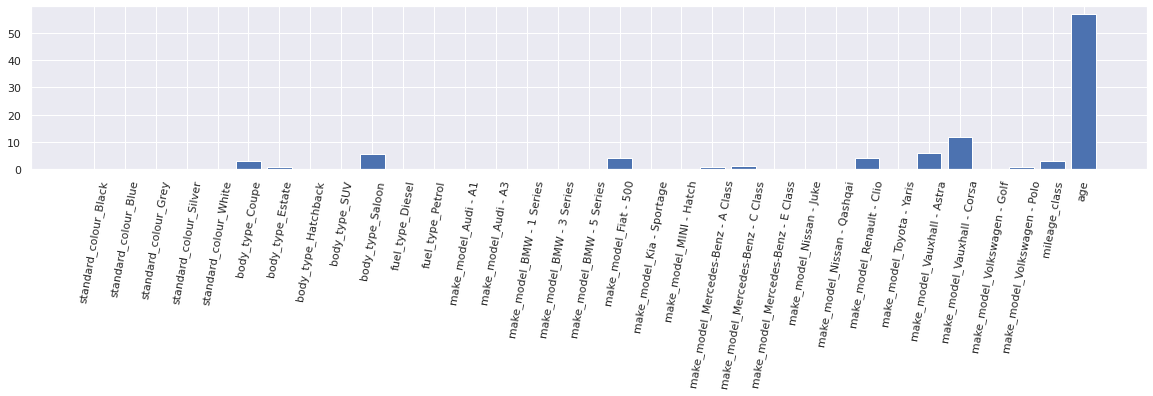

In [ ]:
plt.rcParams["figure.figsize"] = (20,3)
plt.bar(x = X_train.columns, height = (list(dtc_md7.feature_importances_*100)))
plt.xticks(rotation = 80)
plt.plot()

#### 4.1.3 Support Vector Machine

Testing our SVC model, we get a macro-accuracy 78.5%  

This is 0.1% worse than the KNN classifier.

`It is not surprising that the SVC model performed almost as well as KNN, the classification and segregation method for both algorithms follow a similar idea although SVC attemts to fit a hyper plane accross the classes of data.`

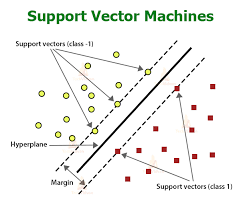

In [ ]:
# # fit/evaluate
svc = SVC(C=1)
svc = Pipeline([('scaler', MinMaxScaler()), ('model', svc)])
svc.fit(X_train, y_train)
svc_acc_train = accuracy_score(y_train, svc.predict(X_train))
svc_bacc_train = balanced_accuracy_score(y_train, svc.predict(X_train))
svc_acc_test = accuracy_score(y_test, svc.predict(X_test))
svc_bacc_test = balanced_accuracy_score(y_test, svc.predict(X_test))

In [ ]:
svc_scores_df = pd.DataFrame(
    dict(
        micro_acc_train=svc_acc_train,
        macro_acc_train=svc_bacc_train,
        micro_acc_test=svc_acc_test,
        macro_acc_test=svc_bacc_test
    ), 
    index=['SVC']
)
svc_scores_df

,micro_acc_train,macro_acc_train,micro_acc_test,macro_acc_test
SVC,0.867558,0.789776,0.865082,0.785566


In [ ]:
svc_scores_df = pd.DataFrame(
    dict(
        micro_acc_train=svc_acc_train,
        macro_acc_train=svc_bacc_train,
        micro_acc_test=svc_acc_test,
        macro_acc_test=svc_bacc_test
    ), 
    index=['SVC']
)
svc_scores_df

,micro_acc_train,macro_acc_train,micro_acc_test,macro_acc_test
SVC,0.867558,0.789776,0.865082,0.785566


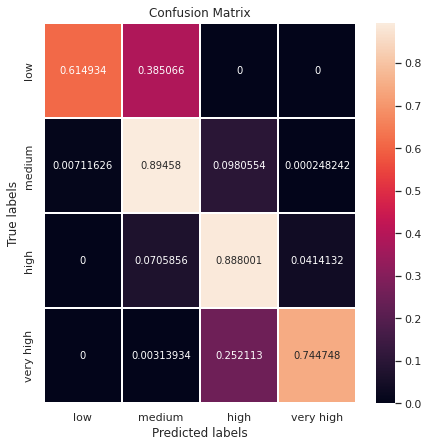

In [ ]:
cm = confusion_matrix(
    y_test, svc.predict(X_test), normalize='true'
)
# ConfusionMatrixDisplay(confusion_matrix=cm).plot();
ax= plt.subplot()
plt.rcParams["figure.figsize"] = (7,7)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, linewidths=1, linecolor='white');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(classified_price_map.keys()); 
ax.yaxis.set_ticklabels(classified_price_map.keys());

In [ ]:
# from sklearn.model_selection import cross_val_score
cross_val_score(svc, X_test, y_test)

array([0.85681558, 0.860252  , 0.8599018 , 0.85842881, 0.85908347])

In [ ]:
cross_val_score(dtc_md5, X_test, y_test)

array([0.76108657, 0.76272296, 0.75515548, 0.76219313, 0.76153846])

#### 4.1.4 Logistic Regression

Testing our LGR model, we get a macro-accuracy 70.6%  

This is 10.4% worse than the KNN classifier.

In [ ]:
lgr = LogisticRegression(C=0.1)
lgr = Pipeline([('scaler', MinMaxScaler()), ('model', lgr)])
lgr.fit(X_train, y_train)
lgr_acc_train = accuracy_score(y_train, lgr.predict(X_train))
lgr_bacc_train = balanced_accuracy_score(y_train, lgr.predict(X_train))
lgr_acc_test = accuracy_score(y_test, lgr.predict(X_test))
lgr_bacc_test = balanced_accuracy_score(y_test, lgr.predict(X_test))

In [ ]:
lgr_scores_df = pd.DataFrame(
    dict(
        micro_acc_train=lgr_acc_train,
        macro_acc_train=lgr_bacc_train,
        micro_acc_test=lgr_acc_test,
        macro_acc_test=lgr_bacc_test
    ), 
    index=['LGR']
)
lgr_scores_df

,micro_acc_train,macro_acc_train,micro_acc_test,macro_acc_test
LGR,0.850098,0.708901,0.850223,0.70684


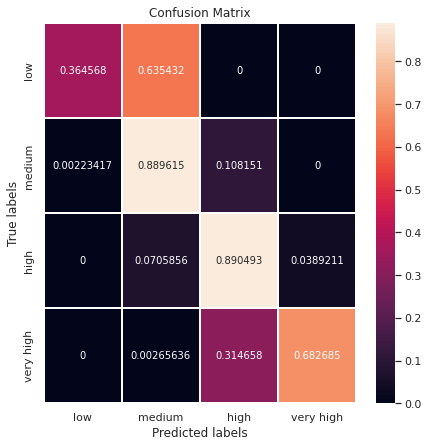

In [ ]:
cm = confusion_matrix(
    y_test, lgr.predict(X_test), normalize='true'
)
# ConfusionMatrixDisplay(confusion_matrix=cm).plot();
ax= plt.subplot()
plt.rcParams["figure.figsize"] = (7,7)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, linewidths=1, linecolor='white');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(classified_price_map.keys()); 
ax.yaxis.set_ticklabels(classified_price_map.keys());

In [ ]:
# stack the five DataFrames (compatible columns)
scores_df = pd.concat(
    [
        knnc_scores_df, dtc_scores_df, svc_scores_df, lgr_scores_df
    ],
    axis='rows'
)
scores_df.sort_values('macro_acc_test', ascending=False)

,micro_acc_train,macro_acc_train,micro_acc_test,macro_acc_test
kNN_11_distance,0.901382,0.867221,0.851205,0.788986
SVC,0.867558,0.789776,0.865082,0.785566
kNN_5_distance,0.898367,0.863136,0.846917,0.781553
kNN_11_uniform,0.876118,0.806690,0.857587,0.779767
kNN_5_uniform,0.881939,0.825151,0.852939,0.774197
LGR,0.850098,0.708901,0.850223,0.706840
DecisionTree_MaxDepth_7,0.792058,0.642166,0.788786,0.640082
DecisionTree_MaxDepth_5,0.765167,0.562687,0.762667,0.565520
DecisionTree_MaxDepth_2,0.687942,0.404103,0.687353,0.405706


### 4.2 Conclusion

The overall best performing model and parameters for Autotrader according to the table above is the `KNN classifier with a N=11 and using distance as weight` with `Micro Accuracy of 85% and Macro Accuracy of 78.8%`.

Although `SVC` with `Micro Accuracy of 86.5% and Macro Accuracy of 78.5%` works quite well as seen in the micro accuracy column it doesn't do as well overall, and with our auto trader prediction needing correct predictions to be just as accurate accross all classes the `macro accuracy` is hence the most important metric for this classification operation. 

`AutoTrader` in `real world usage` of this results would do best to give equal trials to both `SVC` and `KNN` to see the response of both models to day to day real world data, and further strengthen the decision on which model is best overall.

`Decision tree classifier` seemed to perform the worst. Further inspection on the feature importance assigned by the model, the columns selected might not be the best and hence took a big hit at overall accuracy of the model. Further feature engineering might need to be carried out if `decision tree` is to be maintained for this classification operation like deleting a couple of columns which were seen as important but shouldn't.

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
data = pd.read_csv("train.csv")

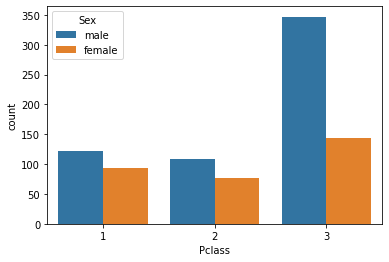

In [ ]:
sns.countplot(x="Pclass", hue="Sex", data = data)

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# MATPLOTLIB SUBPLOTS

In [ ]:
from matplotlib import pyplot as plt
sns.set() 

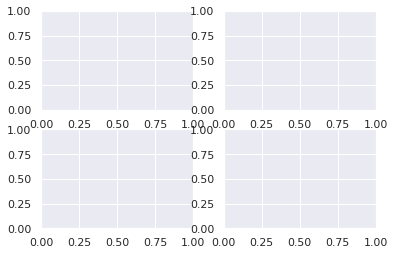

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2)

<BarContainer object of 3 artists>

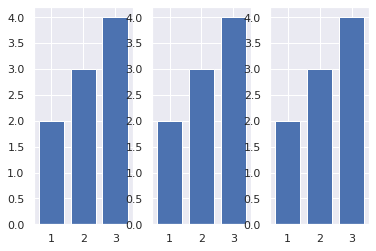

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].bar(x = [1,2,3], height = [2,3,4])
ax[1].bar(x = [1,2,3], height = [2,3,4])
ax[2].bar(x = [1,2,3], height = [2,3,4])

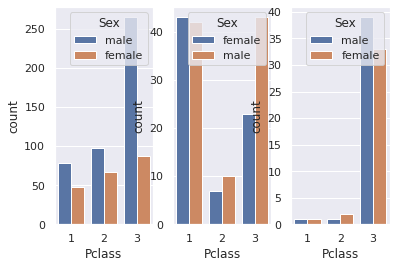

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3)
sns.countplot(x="Pclass", hue="Sex", data = data[data['Embarked']=='S'], ax=ax[0])
sns.countplot(x="Pclass", hue="Sex", data = data[data['Embarked']=='C'], ax=ax[1])
sns.countplot(x="Pclass", hue="Sex", data = data[data['Embarked']=='Q'], ax=ax[2])
plt.savefig("image.pdf")

Text(0.5, 0.98, 'MAJOR CHART')

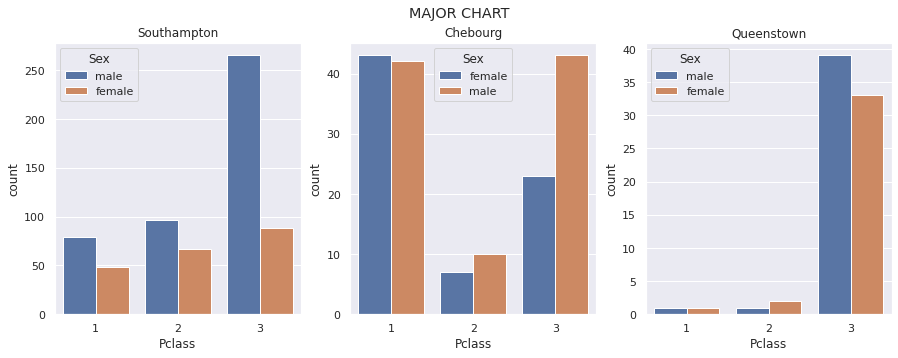

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True) # FIGSIZE INCREASES THE SIZE OF OUR CANVAS
sns.countplot(x="Pclass", hue="Sex", data = data[data['Embarked']=='S'], ax=ax[0])
sns.countplot(x="Pclass", hue="Sex", data = data[data['Embarked']=='C'], ax=ax[1])
sns.countplot(x="Pclass", hue="Sex", data = data[data['Embarked']=='Q'], ax=ax[2])
ax[0].set_title("Southampton")
ax[1].set_title("Chebourg")
ax[2].set_title("Queenstown")
fig.suptitle("MAJOR CHART")

Text(0.5, 0.98, 'MAJOR CHART')

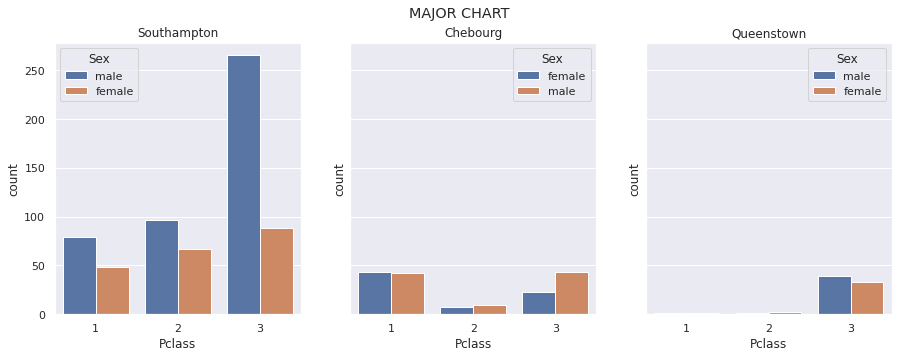

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True) # FIGSIZE INCREASES THE SIZE OF OUR CANVAS
sns.countplot(x="Pclass", hue="Sex", data = data[data['Embarked']=='S'], ax=ax[0])
sns.countplot(x="Pclass", hue="Sex", data = data[data['Embarked']=='C'], ax=ax[1])
sns.countplot(x="Pclass", hue="Sex", data = data[data['Embarked']=='Q'], ax=ax[2])
ax[0].set_title("Southampton")
ax[1].set_title("Chebourg")
ax[2].set_title("Queenstown")
fig.suptitle("MAJOR CHART")